In [138]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

## Import the dataset

Import the CIFAR-10 dataset from Keras using the load_data function

In [114]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Investigate and preprocess the dataset

Investigate the properties of the training and test data

In [115]:
print(f"Number of training data rows: {x_train.shape[0]}")
print(f"Number of test data rows: {x_test.shape[0]}")
print(f'Resolution of each image: {x_train.shape[1]} x {x_train.shape[2]}')
print(f'Number of channels: {x_train.shape[3]}')
print(f'Number of classes: {len(np.unique(y_train))}')

Number of training data rows: 50000
Number of test data rows: 10000
Resolution of each image: 32 x 32
Number of channels: 3
Number of classes: 10


We can see that there are 50,000 training images and 10,000 test images meaning that the dataset is split into ~83% training and ~17% test data. Each image is 32x32 pixels with 3 channels (RGB).

In order to effectively compare the models, we need to create a validation set. A good starting point is usually 80% training and 20% testing, then taking 20% of the training set as the validation set.

In [116]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

Display an image corresponding to each of the 10 classes using matplotlib

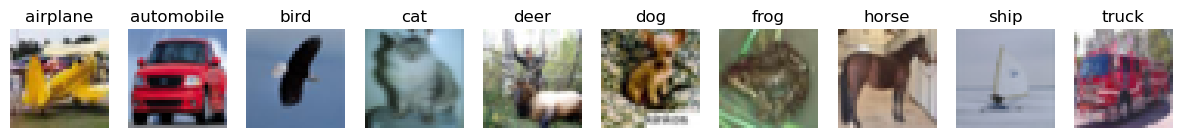

In [117]:
target_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

figure, axis = plt.subplots(1, 10, figsize=(15, 1.5))
for i, target in enumerate(target_names):
    axis[i].imshow(x_train[np.where(y_train==i)[0][0]])
    axis[i].set_title(target)
    axis[i].axis("off")
plt.show()

As the images use the RGB colour model, the pixel values for each image are positive integers in the range of [0,255]. Therefore, we need to normalise the pixel values into the range of [0,1].

In [118]:
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

## Evaluating model performance

Create a function to display the accuracy and loss of the model over the training and validation sets

In [158]:
def evaluate_model(history):
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label = 'Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

Create a function to calculate the accuracy and loss of the model on the test set

In [149]:
def test_model(model):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'Test accuracy: {test_acc}')
    print(f'Test loss: {test_loss}')

Create a function to display the confusion matrix of the model

In [150]:
def confusion_matrix(model):
    predictions = model.predict(x_test)
    predictions = np.argmax(predictions, axis=1)
    cm = tf.math.confusion_matrix(y_test, predictions)
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.show()

## Build a simple neural network

Create a simple neural network consisting of a single fully connected layer as a baseline:

- It has an input layer with shape (32, 32, 3) corresponding to the 32x32 pixel images with 3 channels. This layer flattens the input image into a 1D array of length 3072.
- This 1D array is passed to a single fully connected layer with 10 neurons and a softmax activation function, where each neuron corresponds to a class.
- The output of the softmax activation function is a probability distribution over the 10 classes in the CIFAR-10 dataset.

Start by using:
- Adam optimiser (as it is a good default choice)
- Sparse categorical cross-entropy loss function (as the labels are integers and this is a good choice according to [the documentation](https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class))

In [151]:
def single_layer_model():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

Train the model for 100 epochs with a batch size of 64 on the training data and evaluate the model on the validation data

In [152]:
single_layer_model = single_layer_model()
history = single_layer_model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
625/625 [==============================] - 2s 2ms/step - loss: 1.9533 - accuracy: 0.3101 - val_loss: 1.8750 - val_accuracy: 0.3271
Epoch 2/100
625/625 [==============================] - 1s 2ms/step - loss: 1.8459 - accuracy: 0.3575 - val_loss: 1.9381 - val_accuracy: 0.3187
Epoch 3/100
625/625 [==============================] - 1s 2ms/step - loss: 1.8381 - accuracy: 0.3617 - val_loss: 1.8303 - val_accuracy: 0.3584
Epoch 4/100
625/625 [==============================] - 1s 2ms/step - loss: 1.8037 - accuracy: 0.3738 - val_loss: 1.8248 - val_accuracy: 0.3616
Epoch 5/100
625/625 [==============================] - 1s 2ms/step - loss: 1.7863 - accuracy: 0.3829 - val_loss: 1.8014 - val_accuracy: 0.3654
Epoch 6/100
625/625 [==============================] - 1s 2ms/step - loss: 1.7837 - accuracy: 0.3837 - val_loss: 1.8149 - val_accuracy: 0.3643
Epoch 7/100
625/625 [==============================] - 1s 2ms/step - loss: 1.7792 - accuracy: 0.3852 - val_loss: 1.7557 - val_accuracy: 0.3893

Evaluate the model by plotting the accuracy and loss over the training and validation sets

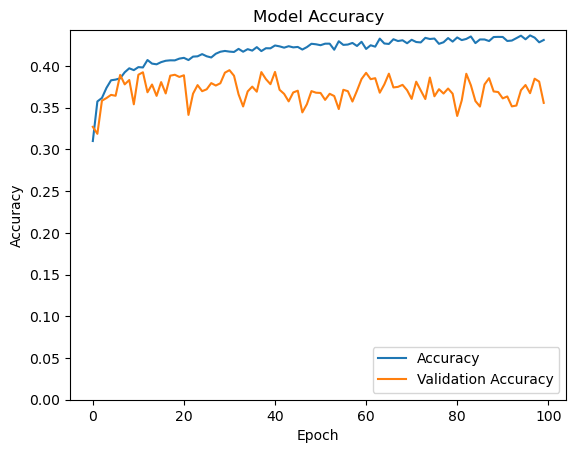

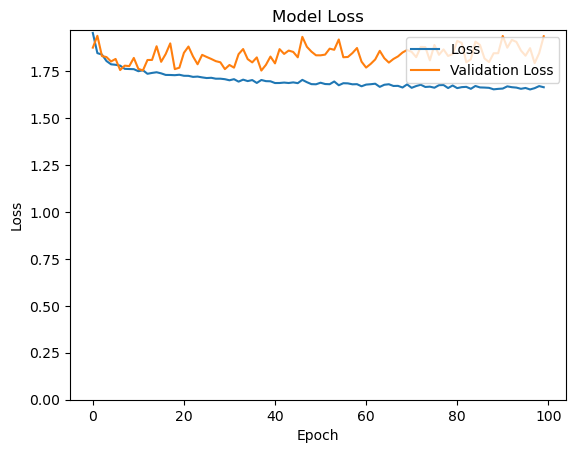

In [153]:
evaluate_model(history)

Run the model on the test set and display the confusion matrix

313/313 - 1s - loss: 1.9357 - accuracy: 0.3558 - 504ms/epoch - 2ms/step
Test accuracy: 0.35580000281333923
Test loss: 1.9357216358184814
313/313 [==============================] - 0s 923us/step


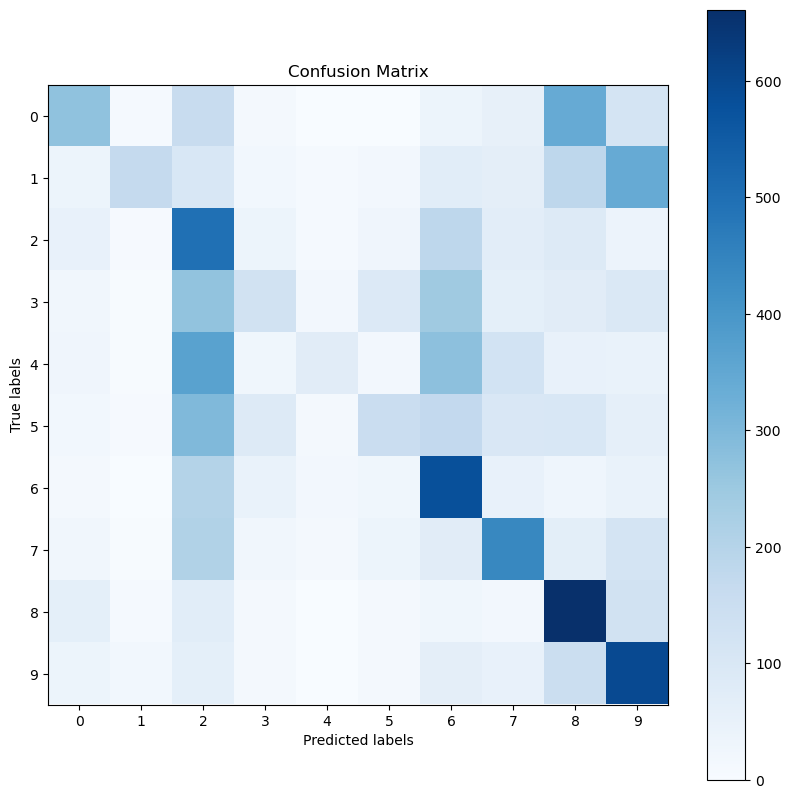

In [154]:
test_model(single_layer_model)
confusion_matrix(single_layer_model)

## Build a Convolutional Neural Network with VGG architecture

Create a CNN with one VGG block. A VGG block consists of 2 convolutional layers with 3x3 filters and 32 filters each, followed by a max pooling layer with a 2x2 filter.
The output of the VGG block is flattened and passed to a Dense layer with 128 neurons and a ReLU activation function. The output is then passed to another Dense layer with 10 neurons and a softmax activation function.

In [155]:
def vgg_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

Same as before, train the model for 100 epochs with a batch size of 64 on the training data and evaluate the model on the validation data

In [156]:
vgg_model = vgg_model()
history = vgg_model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
625/625 [==============================] - 3s 4ms/step - loss: 1.4525 - accuracy: 0.4830 - val_loss: 1.1835 - val_accuracy: 0.5831
Epoch 2/100
625/625 [==============================] - 2s 3ms/step - loss: 1.0470 - accuracy: 0.6345 - val_loss: 1.0383 - val_accuracy: 0.6360
Epoch 3/100
625/625 [==============================] - 2s 3ms/step - loss: 0.8967 - accuracy: 0.6877 - val_loss: 0.9697 - val_accuracy: 0.6617
Epoch 4/100
625/625 [==============================] - 2s 3ms/step - loss: 0.7814 - accuracy: 0.7263 - val_loss: 0.9720 - val_accuracy: 0.6711
Epoch 5/100
625/625 [==============================] - 2s 3ms/step - loss: 0.6784 - accuracy: 0.7637 - val_loss: 0.9773 - val_accuracy: 0.6730
Epoch 6/100
625/625 [==============================] - 2s 3ms/step - loss: 0.5731 - accuracy: 0.8000 - val_loss: 1.0640 - val_accuracy: 0.6617
Epoch 7/100
625/625 [==============================] - 2s 3ms/step - loss: 0.4687 - accuracy: 0.8368 - val_loss: 1.1104 - val_accuracy: 0.6643

Evaluate the model - the expected accuracy should be much higher than the simple neural network

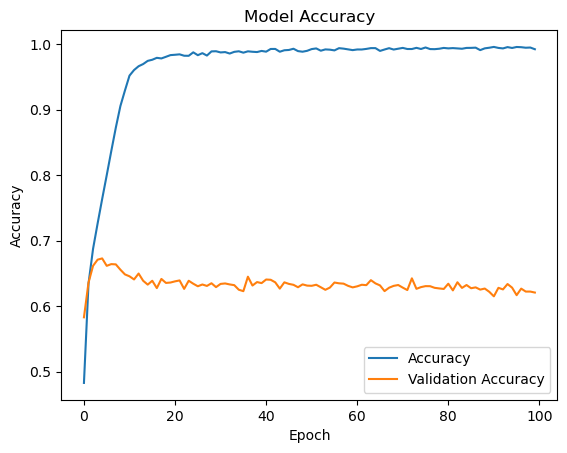

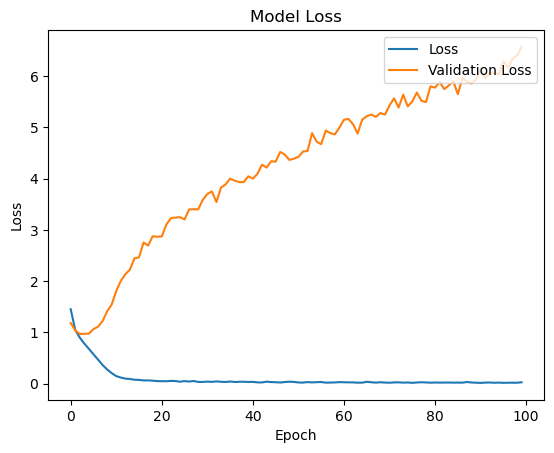

313/313 - 1s - loss: 6.5710 - accuracy: 0.6210 - 888ms/epoch - 3ms/step
Test accuracy: 0.6209999918937683
Test loss: 6.570978164672852
313/313 [==============================] - 0s 1ms/step


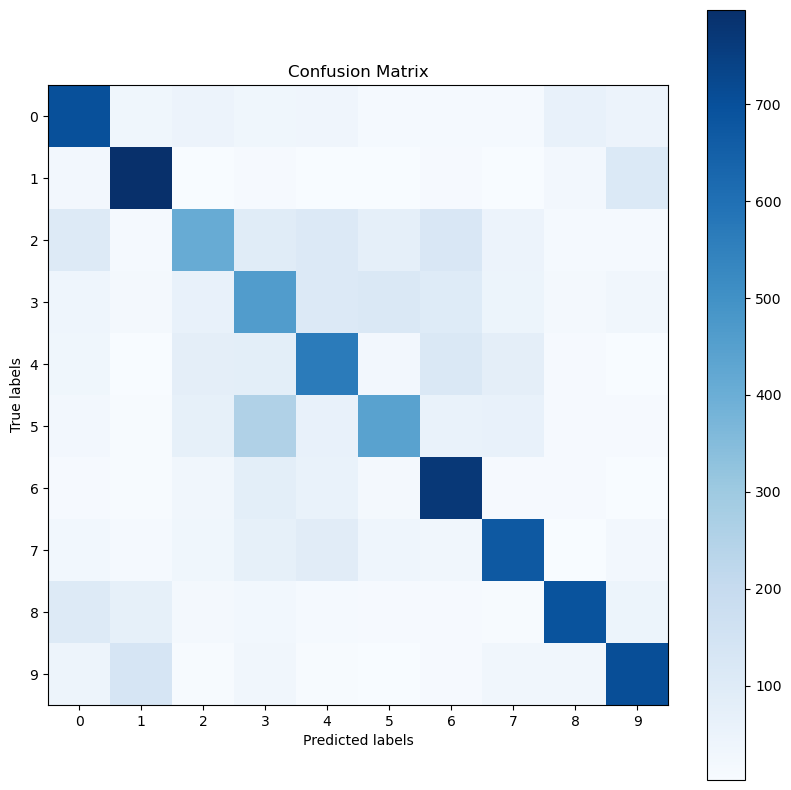

In [159]:
evaluate_model(history)
test_model(vgg_model)
confusion_matrix(vgg_model)

As expected, the accuracy is much higher than the simple neural network. This is reflected in the confusion matrix, where the model is much better at predicting the correct class for each image (the diagonal is much lighter than the simple neural network's confusion matrix).

However, the model is rapidly overfitting the validation data set after a few epochs. This may be because the model is too complex for the small dataset, therefore we need to add some regularisation to the model.

## Build a Convolutional Neural Network with ResNet architecture